In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

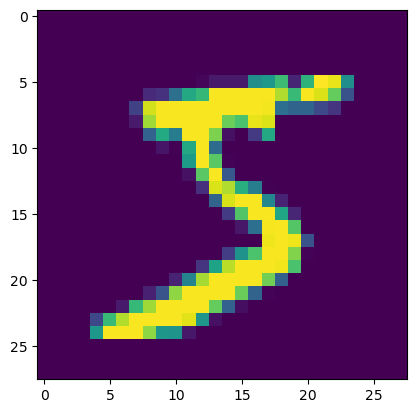

In [4]:
plt.imshow(x_train[0])
plt.show()

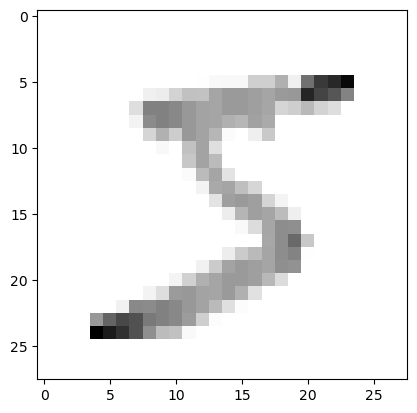

In [5]:
#normalizing data/ pre-processing step
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_teest = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [6]:
#RESIZING IMAGE
IMG_SIZE=28
x_trainr= np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr= np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print ("training sample dimensions",x_trainr.shape)
print ("testing sample dimensions",x_testr.shape)

training sample dimensions (60000, 28, 28, 1)
testing sample dimensions (10000, 28, 28, 1)


In [7]:
#CREATING DEEP LEARNING ARCHITECTURE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
model =Sequential()


In [8]:
#Convolution layer 1
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolution layer 2
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolution layer 3
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully Connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Fully Connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))
 
#Last Fully Connected layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [10]:
model.compile(loss ="sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [11]:

model.fit(x_trainr,y_train, epochs=5,batch_size=1, validation_split = 0.3)

Epoch 1/5
42000/42000 [==============================] - 138s 3ms/step - loss: 0.2466 - accuracy: 0.9249 - val_loss: 0.1031 - val_accuracy: 0.9717
Epoch 2/5
42000/42000 [==============================] - 121s 3ms/step - loss: 0.1146 - accuracy: 0.9691 - val_loss: 0.1413 - val_accuracy: 0.9667
Epoch 3/5
42000/42000 [==============================] - 119s 3ms/step - loss: 0.1015 - accuracy: 0.9741 - val_loss: 0.1465 - val_accuracy: 0.9672
Epoch 4/5
42000/42000 [==============================] - 122s 3ms/step - loss: 0.0960 - accuracy: 0.9764 - val_loss: 0.1043 - val_accuracy: 0.9752
Epoch 5/5
42000/42000 [==============================] - 121s 3ms/step - loss: 0.1009 - accuracy: 0.9760 - val_loss: 0.1018 - val_accuracy: 0.9761


In [12]:
test_loss, test_acc = model.evaluate(x_testr, y_test, batch_size=1)
print ("test loss on 10000 samples", test_loss)
print ("validation accuracy on 10000 samples", test_acc)

10000/10000 [==============================] - 13s 1ms/step - loss: 2152.7468 - accuracy: 0.8590
test loss on 10000 samples 2152.746826171875
validation accuracy on 10000 samples 0.859000027179718


In [13]:
predictions = model .predict([x_testr])

313/313 [==============================] - 2s 6ms/step


In [14]:
print(predictions)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
print (np.argmax(predictions[7829]))

3


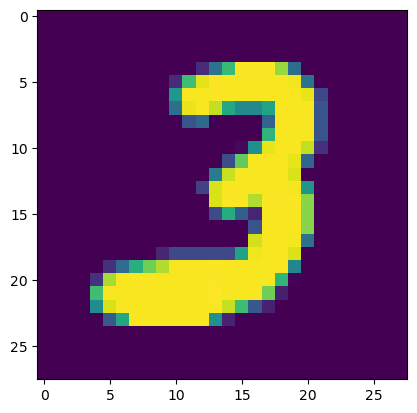

In [18]:
plt.imshow(x_testr[7829])